>#### Mon Jul 15, 2024.
> - Evaluating the PreAmp operation with and without SiPM.


In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
import os

# Specify the folder path
folder_path = 'PreAmps_NoLowPassFilter_data/'

# Get a list of all CSV files in the folder
csv_files = glob.glob(os.path.join(folder_path, '*.csv'))

# List to store individual data frames
data_frames = []

# Loop through the list of CSV files and read each one
for file in csv_files:
    df = pd.read_csv(file, skiprows=3, header=None)
    data_frames.append(df)

In [76]:
filenames =  [filelocation[29:-4] for filelocation in csv_files]

time_data = [np.array(data.iloc[:,0]) for data in data_frames]
voltage_data = [np.array(data.iloc[:,1]) for data in data_frames]


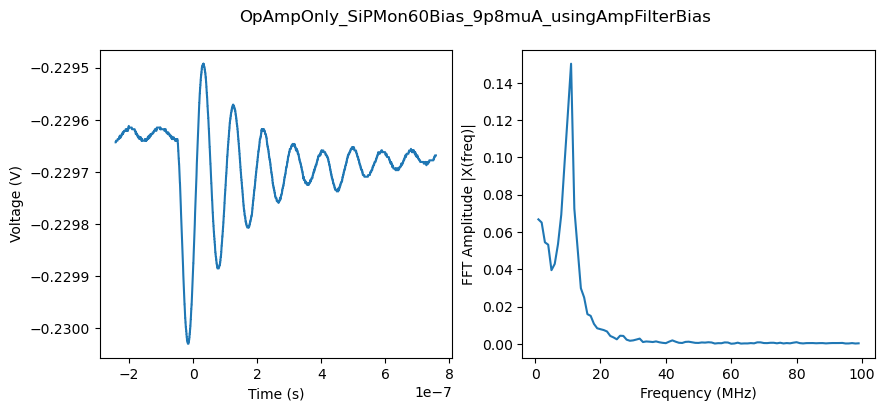

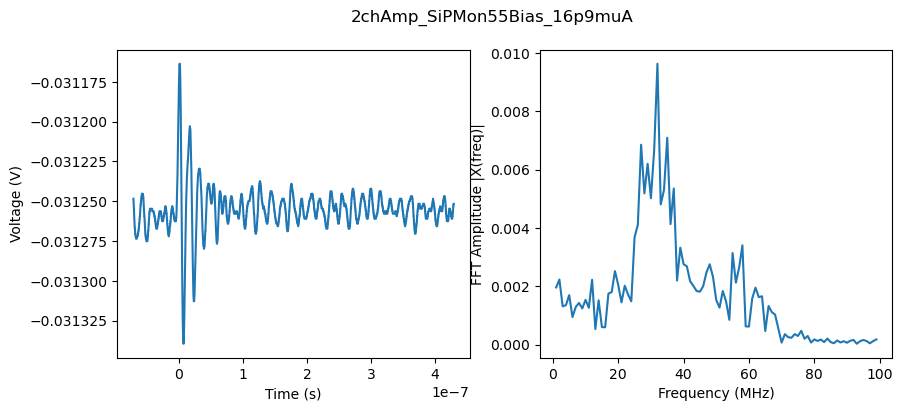

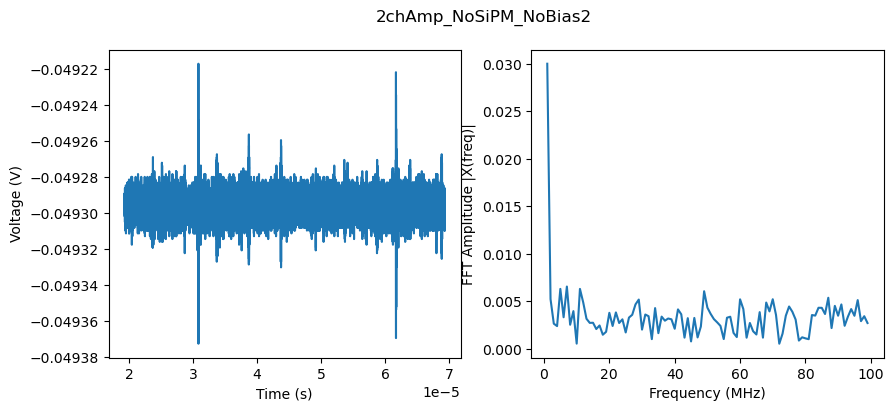

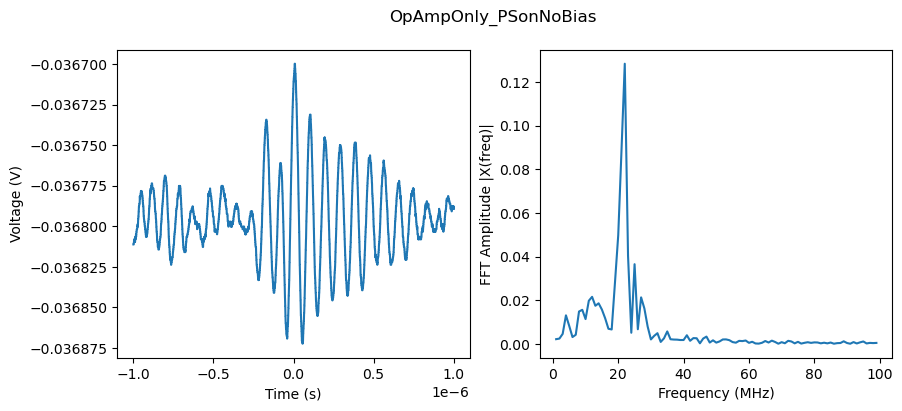

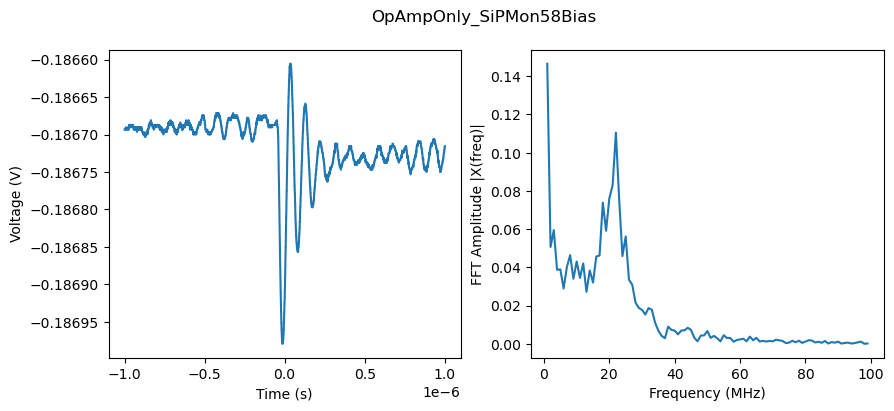

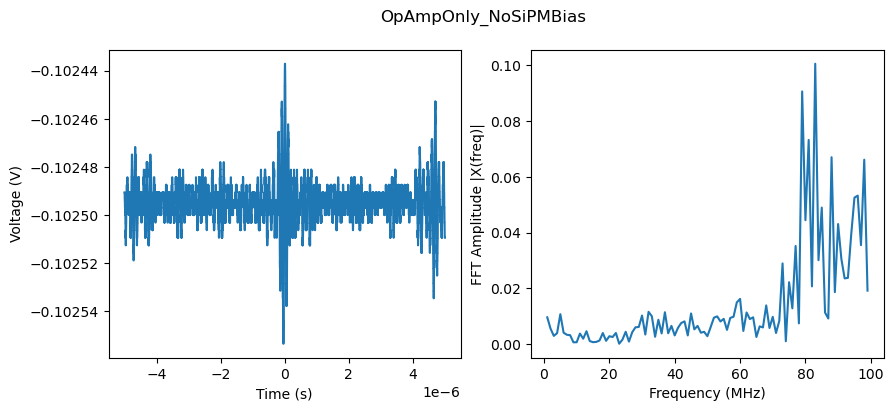

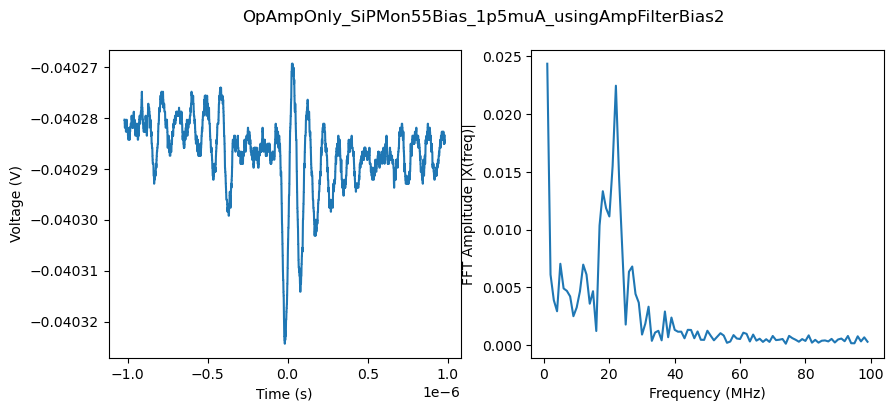

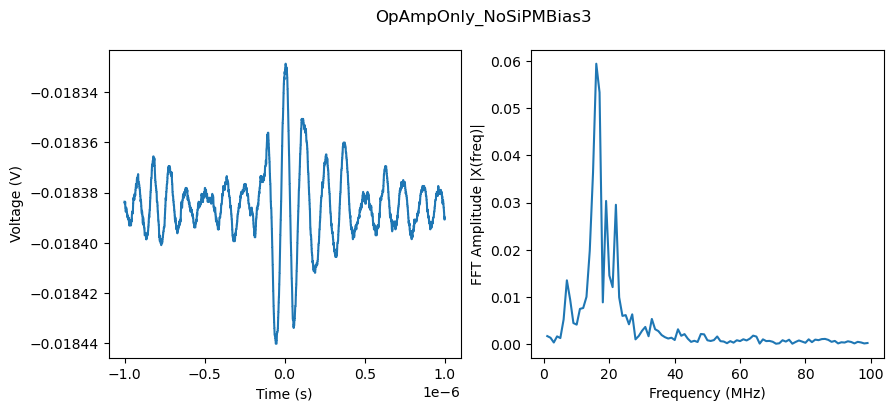

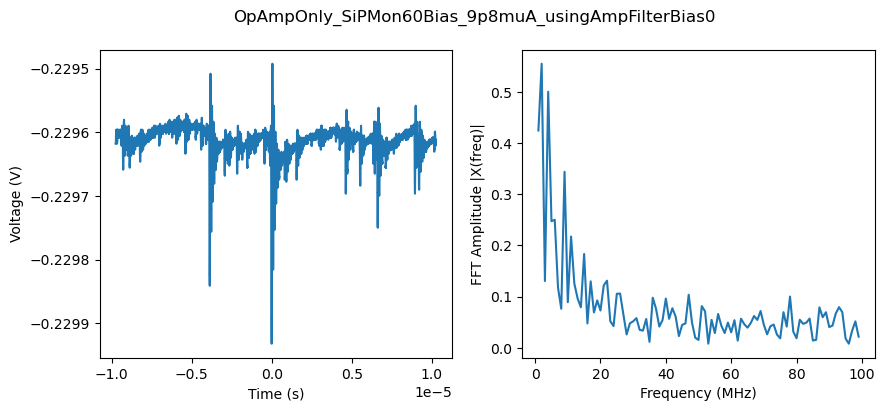

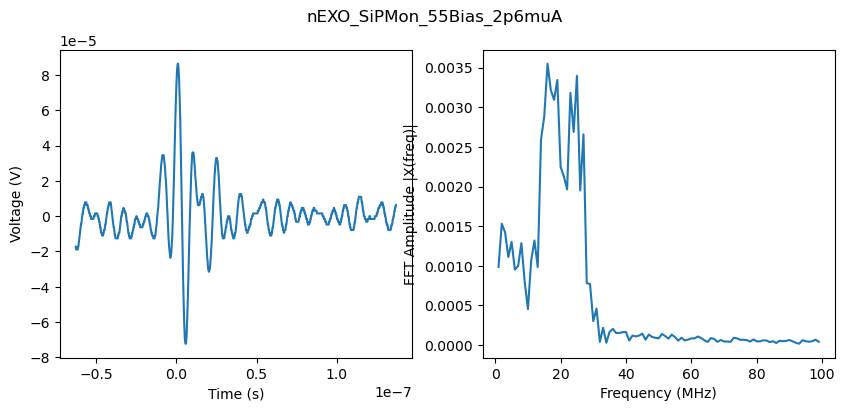

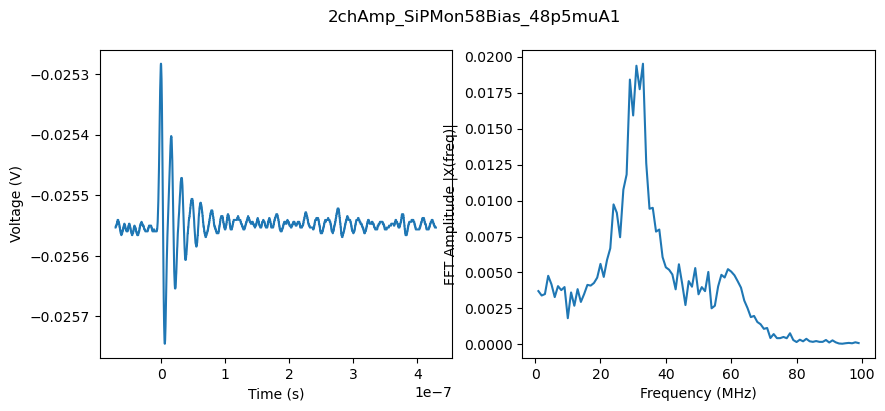

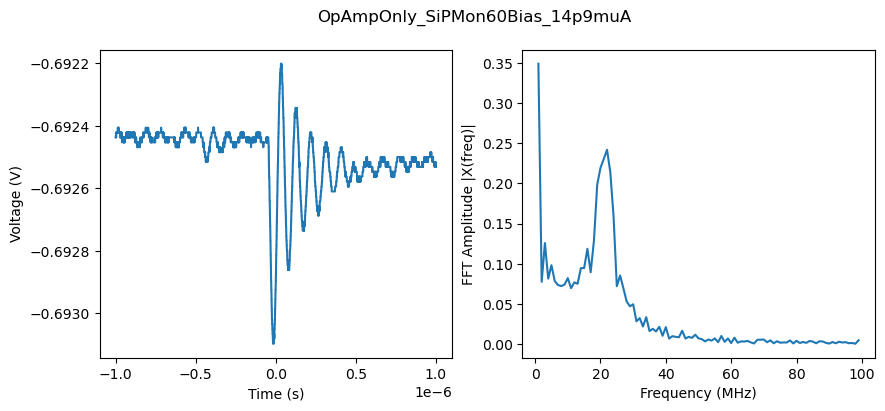

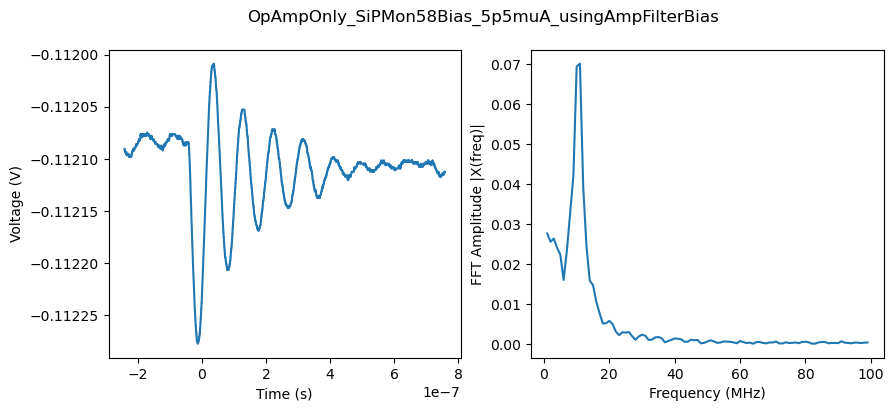

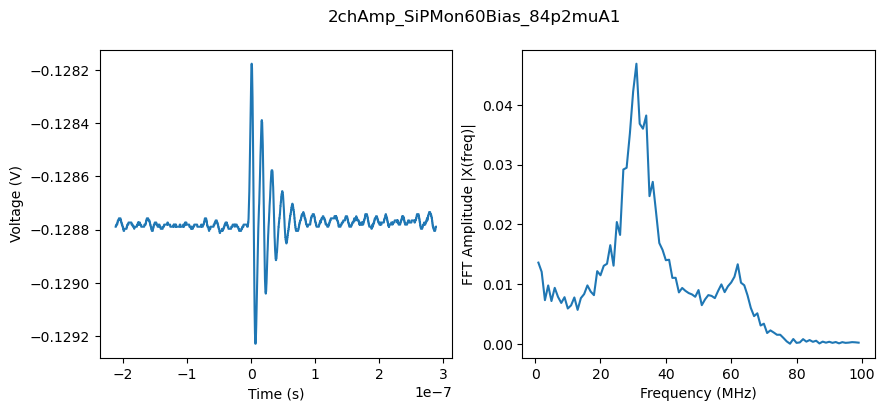

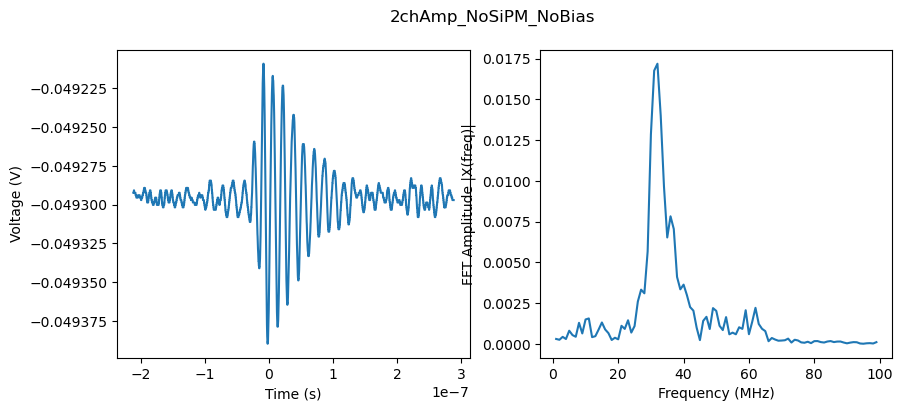

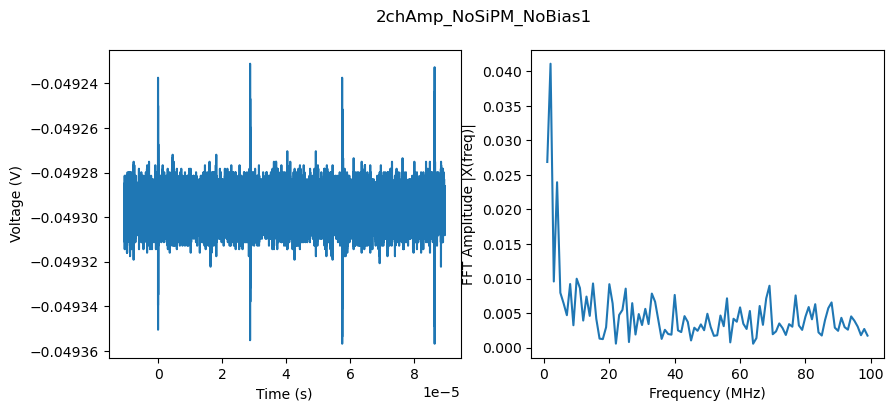

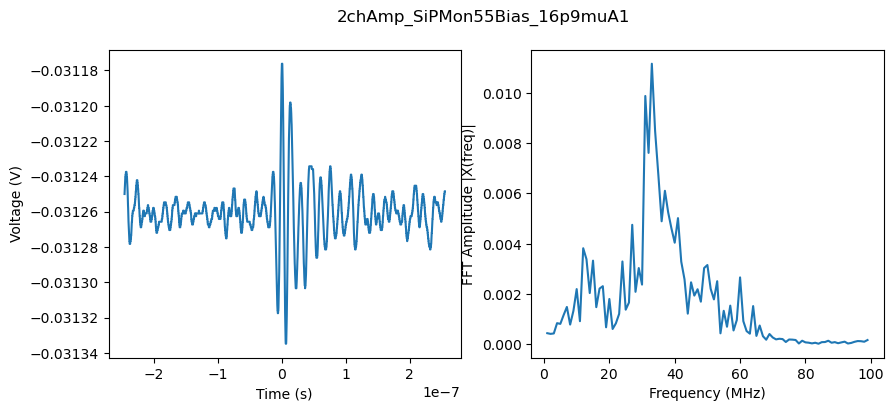

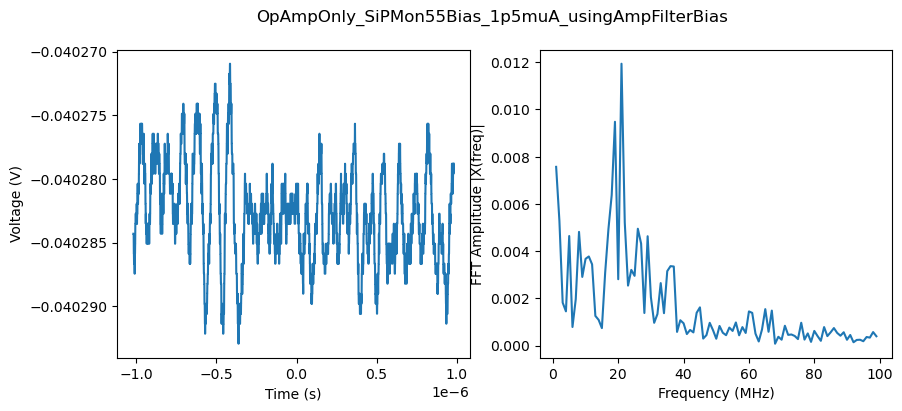

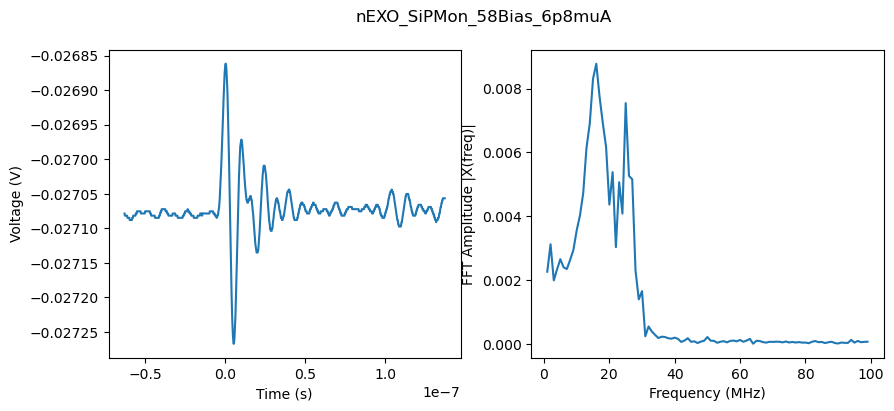

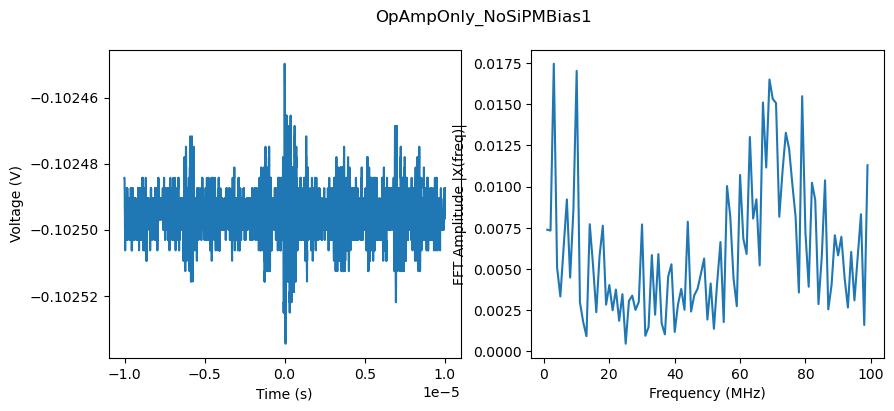

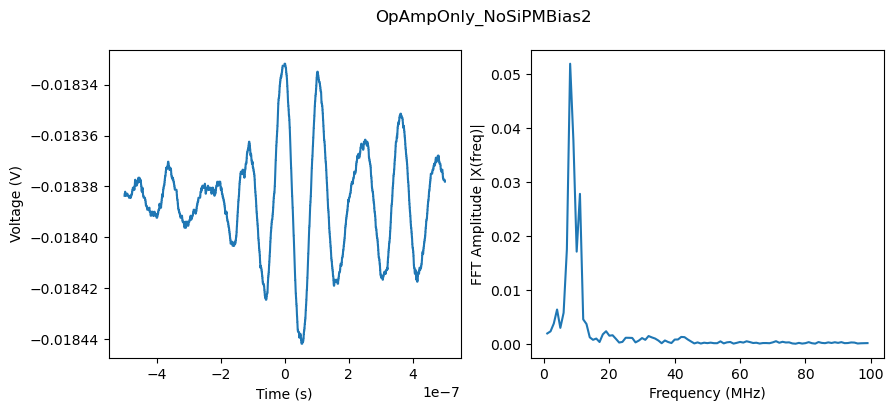

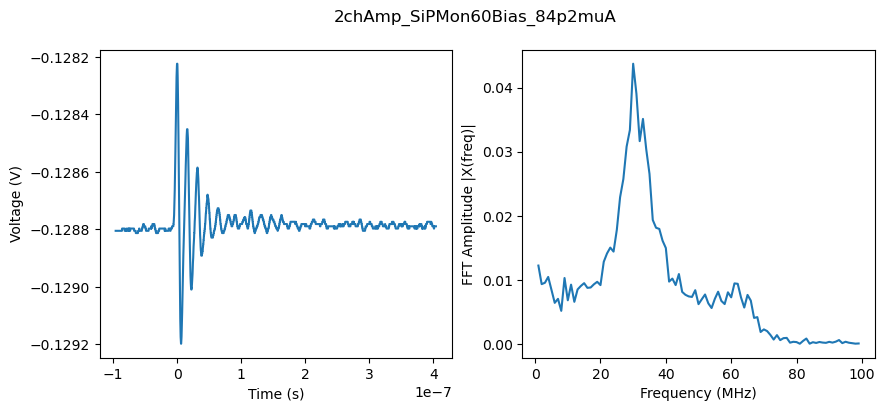

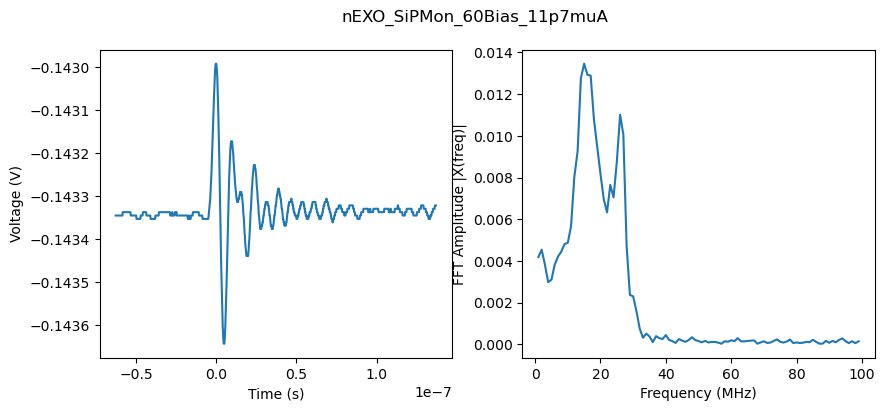

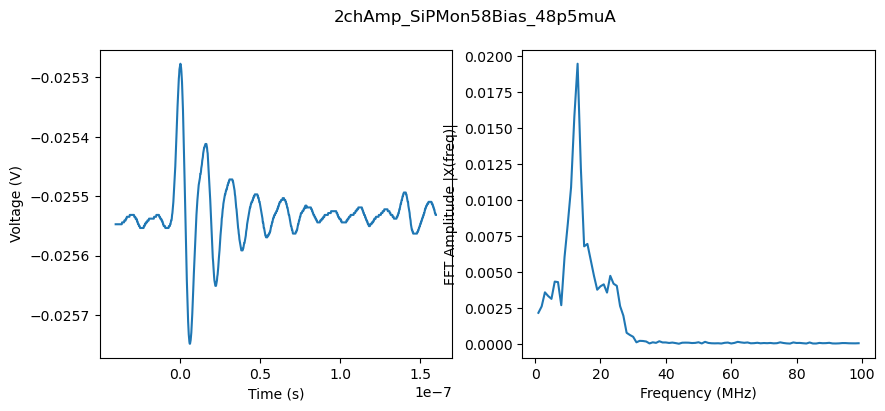

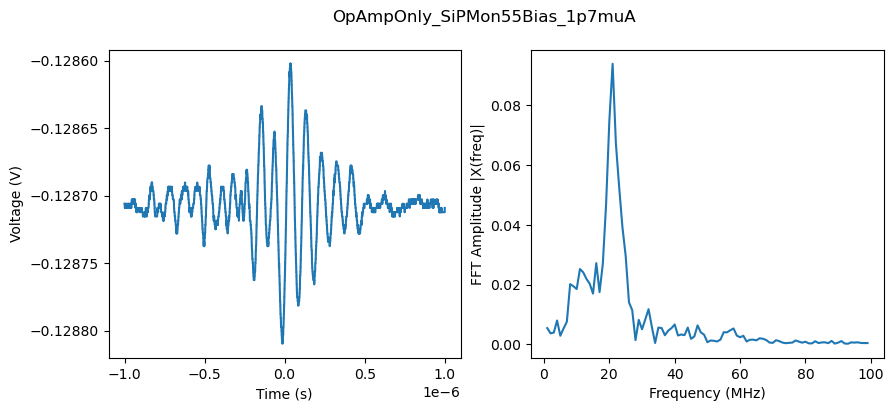

In [78]:
from scipy.fftpack import fft, ifft, fftfreq



X = [np.abs(fft(y)) for y in voltage_data]
T = [1.0 / len(x) for x in time_data]
N = [len(Xi) for Xi in X]
freq = [fftfreq(Ni, T[id]) for id, Ni in enumerate(N)]


X = [ Xi[freq[id] > 0] for id, Xi in enumerate(X) ]
freq = [np.abs(freqi[freqi>0]) for freqi in freq] 





for i, scopedata in enumerate(filenames):
    fig, ax = plt.subplots(1, 2, figsize=(10, 4))
    plt.suptitle(scopedata)

    ax[0].plot(time_data[i], voltage_data[i], label =  scopedata)
    ax[0].set_ylabel('Voltage (V)')
    ax[0].set_xlabel('Time (s)')

    ax[1].plot(freq[i][freq[i] < 100], np.abs(X[i][freq[i] < 100]), label =  scopedata)
    ax[1].set_ylabel('FFT Amplitude |X(freq)|')
    ax[1].set_xlabel('Frequency (MHz)')

    plt.show()